## **1. Problem Statement**

We aim to predict individual medical charges billed by health insurance, using personal demographic and life style features like age, sex, BMI, smoking habits, and region.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **2. Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [9]:
df.duplicated().sum()
# one duplicate

np.int64(1)

<Axes: xlabel='charges', ylabel='Count'>

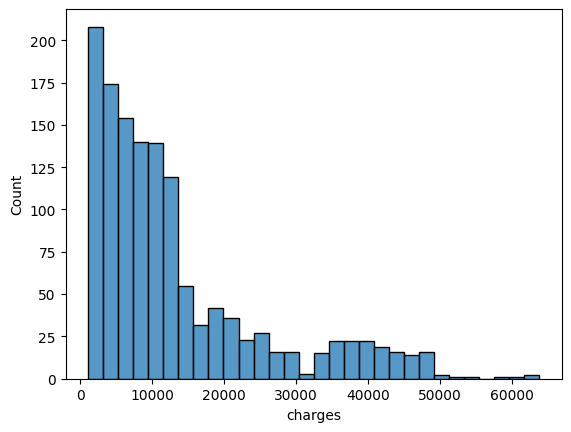

In [11]:
sns.histplot(df["charges"])

Unique values:  sex
male      676
female    662
Name: count, dtype: int64
Unique values:  smoker
no     1064
yes     274
Name: count, dtype: int64
Unique values:  region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


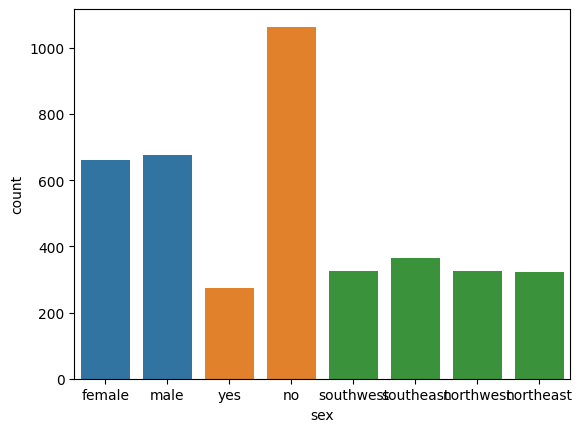

In [14]:
for col in ['sex','smoker','region']:
  print("Unique values: ", df[col].value_counts())
  sns.countplot(data=df,x=col)

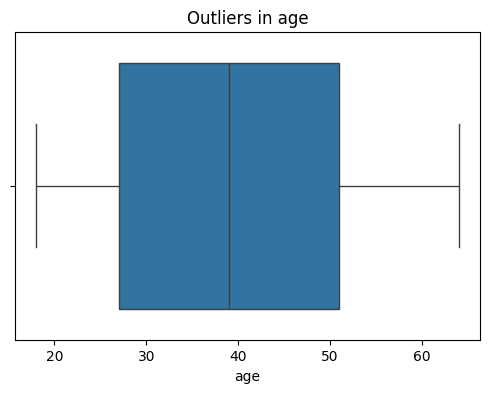

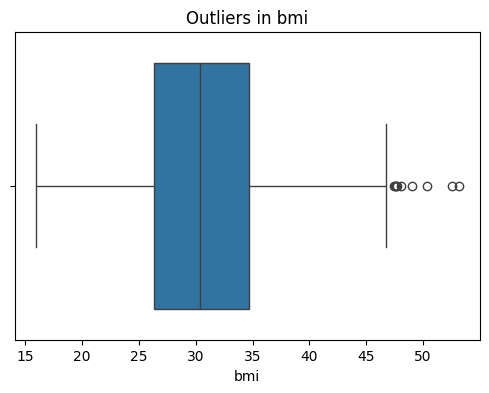

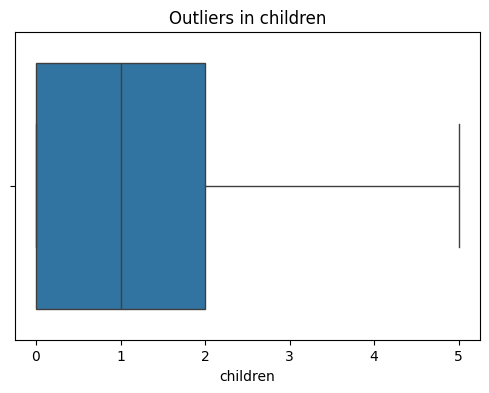

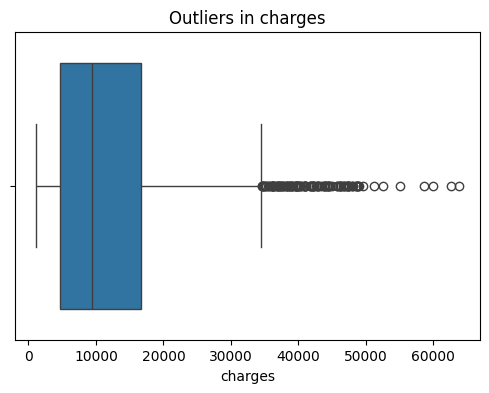

In [17]:
numeric=["age","bmi","children","charges"]
for num in numeric:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[num])
  plt.title(f'Outliers in {num}')
  plt.show()


In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


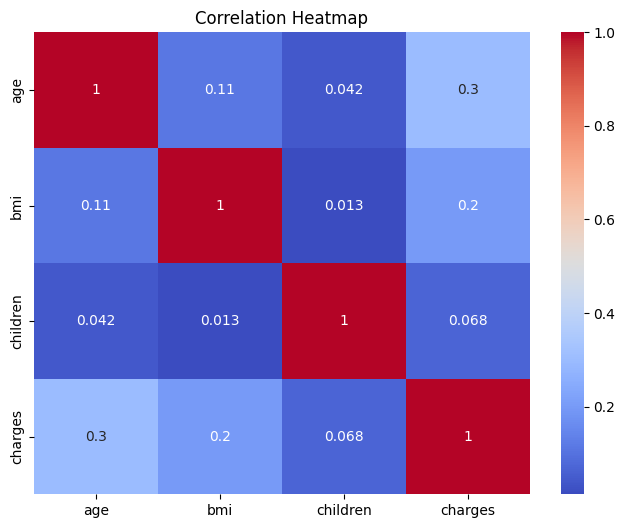

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

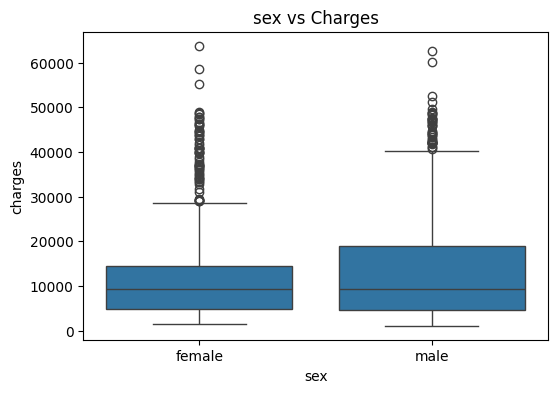

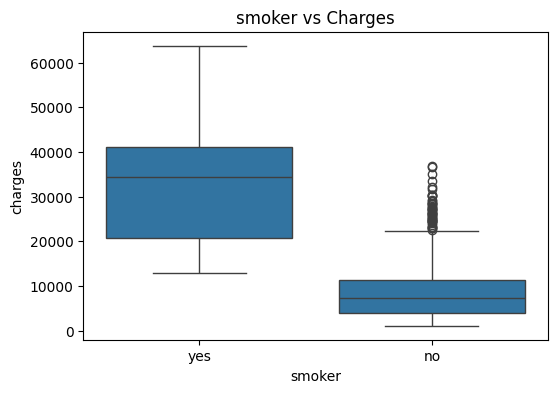

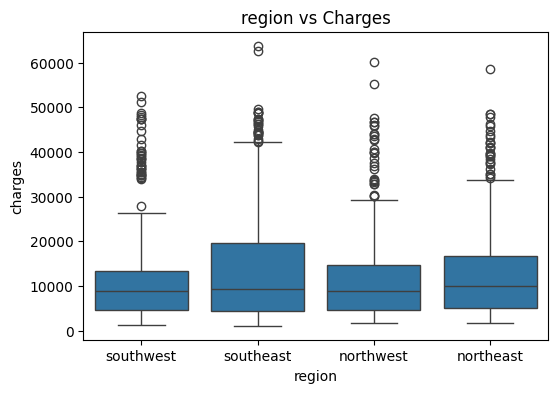

In [25]:
for cat in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cat, y='charges', data=df)
    plt.title(f'{cat} vs Charges')
    plt.show()

## **3. Data Preprocessing**

In [35]:
categorical_columns=['sex','smoker','region']
df_encoded=pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [36]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4. Model Building & Evaluation**

In [47]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_lr_pred=lr.predict(X_test)
print(mean_squared_error(y_test,y_lr_pred))
print(r2_score(y_lr_pred,y_test))

33596915.85136145
0.7088351277198344


In [50]:
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0])

ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_cv.alpha_)
print("Best alpha for Lasso:", lasso_cv.alpha_)


Best alpha for Ridge: 0.1
Best alpha for Lasso: 1.0


In [57]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_ridge_pred=ridge.predict(X_test)
print(mean_squared_error(y_test, y_ridge_pred))
print(r2_score(y_ridge_pred, y_test))

33601489.864824
0.708520904109623


In [58]:
lasso=Lasso()
lasso.fit(X_train, y_train)
y_lasso_pred=lasso.predict(X_test)
print(mean_squared_error(y_test,y_lasso_pred))
print(r2_score(y_lasso_pred, y_test))

33605507.55392852
0.7086242729770513


In [59]:
dc=DecisionTreeRegressor(random_state=42)
dc.fit(X_train, y_train)
y_dc_pred=dc.predict(X_test)
print(mean_squared_error(y_test,y_dc_pred))
print(r2_score(y_dc_pred, y_test))

42446908.010150984
0.7611756657458018


In [60]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred=rf.predict(X_test)
print(mean_squared_error(y_test,y_rf_pred))
print(r2_score(y_rf_pred, y_test))

20942520.922619622
0.8542327984985619


In [61]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_gb_pred=gb.predict(X_test)
print(mean_squared_error(y_test,y_gb_pred))
print(r2_score(y_gb_pred, y_test))

18744808.813573495
0.8632810441964691


In [62]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)
y_xgb_pred=xgb.predict(X_test)
print(mean_squared_error(y_test,y_xgb_pred))
print(r2_score(y_xgb_pred, y_test))

23434704.61742758
0.8382044089371428


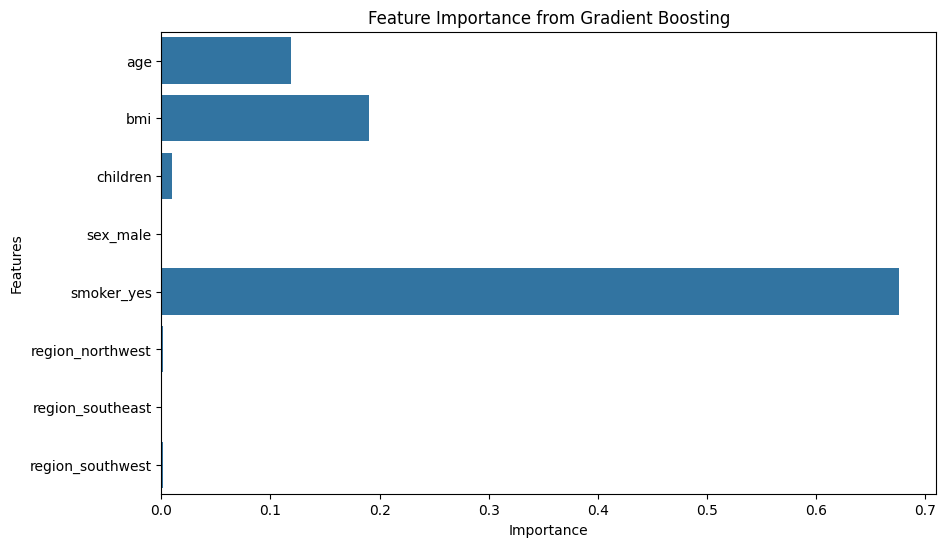

In [65]:
feature_importance = gb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance from Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## **5. Hyperparameter Tuning**

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best R2 Score: 0.8508360594389774


## **6. Final Evaluation on Test Data**

In [71]:
best_gb_model = grid_search.best_estimator_

y_best_pred = best_gb_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_best_pred))
print("R2 Score:", r2_score(y_test, y_best_pred))


MSE: 18442345.548685666
R2 Score: 0.8812077537028835


## **7. Visualize Feature Importance**

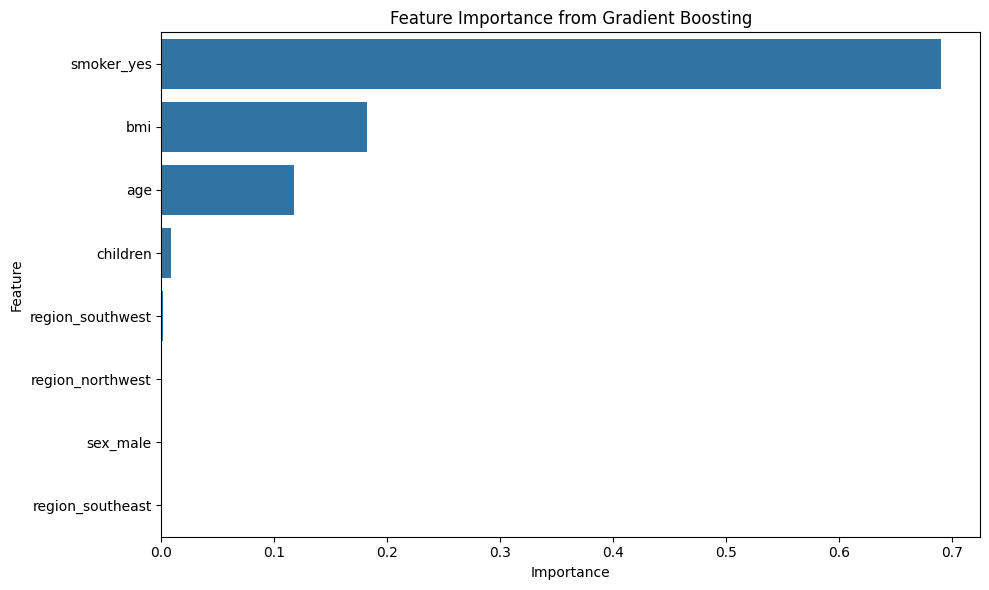

In [69]:
importances = best_gb_model.feature_importances_
features = X_train.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance from Gradient Boosting")
plt.tight_layout()
plt.show()

## **7. Residual Analysis**

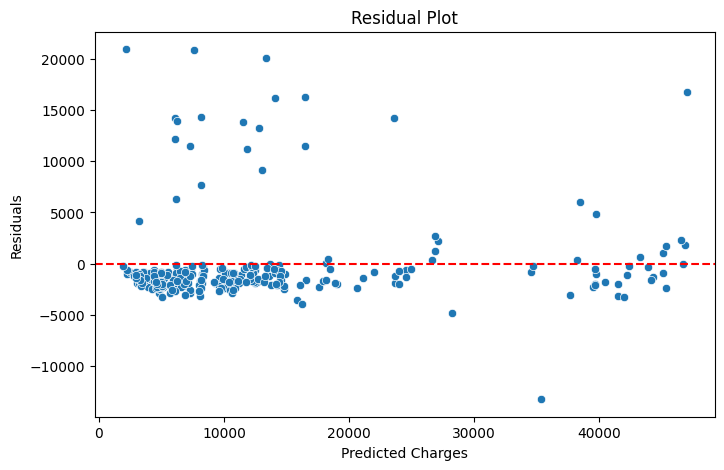

In [70]:
residuals = y_test - y_best_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_best_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
